<a href="https://colab.research.google.com/github/kenil121200/AI-BASIC/blob/main/AI_LAB_Assignment_2_Optimization_Problem_using_Genetic_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Optimization Problem using Genetic Algorithm**

In [1]:
pip install geneticalgorithm

     |████████████████████████████████| 51kB 2.8MB/s 
  Created wheel for func-timeout: filename=func_timeout-4.3.5-cp37-none-any.whl size=15079 sha256=84ae0d65078184c97dadb6d1901d056cab7587acbbc658a3575aafc296e3bc6e
  Stored in directory: /root/.cache/pip/wheels/46/7c/4f/24f1d2d5bbff92219debe7ea19af84f76ddeb90dd4ec544f26
Successfully built func-timeout


In [2]:
# IMPORTING NCESARRY DEPENDENCIES
import numpy
import sklearn
import geneticalgorithm

### **Maximization Optimization Problem**

In [3]:
def cal_pop_fitness(equation_inputs, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    fitness = numpy.sum(pop*equation_inputs, axis=1)
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover, num_mutations=1):
    mutations_counter = numpy.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
    for idx in range(offspring_crossover.shape[0]):
        gene_idx = mutations_counter - 1
        for mutation_num in range(num_mutations):
            # The random value to be added to the gene.
            random_value = numpy.random.uniform(-1.0, 1.0, 1)
            offspring_crossover[idx, gene_idx] = offspring_crossover[idx, gene_idx] + random_value
            gene_idx = gene_idx + mutations_counter
    return offspring_crossover

Streaming output truncated to the last 5000 lines.
  -269.64342844]
 [   2.76868227    3.74276719  257.51392964    3.97117774   -2.64694008
  -269.32085844]
 [   2.76868227    3.74276719  256.10555083    3.97117774   -2.64694008
  -268.42058598]]
Generation :  844
Fitness
[2220.41311027 2218.47462936 2216.330034   2215.7199389  2223.98251733
 2224.70725095 2219.6682127  2210.50760631]
Best result :  2224.707250954118
Parents
[[   2.76868227    3.74276719  258.52048942    3.97117774   -2.64694008
  -269.64342844]
 [   2.76868227    3.74276719  258.46877105    3.97117774   -2.64694008
  -269.52774348]
 [   2.76868227    3.74276719  257.74380393    3.97117774   -2.64694008
  -269.3081643 ]
 [   2.76868227    3.74276719  257.51392964    3.97117774   -2.64694008
  -269.32085844]]
Crossover
[[   2.76868227    3.74276719  258.52048942    3.97117774   -2.64694008
  -269.52774348]
 [   2.76868227    3.74276719  258.46877105    3.97117774   -2.64694008
  -269.3081643 ]
 [   2.76868227    3.74276

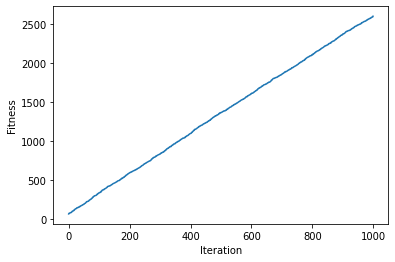

In [4]:
"""
The y=target is to maximize this equation ASAP:
    y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    What are the best values for the 6 weights w1 to w6?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""

# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Number of the weights we are looking to optimize.
num_weights = len(equation_inputs)

"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""
sol_per_pop = 8
num_parents_mating = 4

# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)

"""
new_population[0, :] = [2.4,  0.7, 8, -2,   5,   1.1]
new_population[1, :] = [-0.4, 2.7, 5, -1,   7,   0.1]
new_population[2, :] = [-1,   2,   2, -3,   2,   0.9]
new_population[3, :] = [4,    7,   12, 6.1, 1.4, -4]
new_population[4, :] = [3.1,  4,   0,  2.4, 4.8,  0]
new_population[5, :] = [-2,   3,   -7, 6,   3,    3]
"""

best_outputs = []
num_generations = 1000
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(equation_inputs, new_population)
    print("Fitness")
    print(fitness)

    best_outputs.append(numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    # The best result in the current iteration.
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    
    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = mutation(offspring_crossover, num_mutations=2)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])


import matplotlib.pyplot
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()

## **Minimization Optimization Problem**

In [5]:
import numpy as np
import pandas as pd

## **Staff Planning**
- The goal of this code is to show a genetic algorithm from scratch, while applying it to a business goal.
- Since we are working on an applied business problem, we start from the shape of the staff planning that is required.
- We work with a staff planning in which all employees work every weekday, 5 days a week and the weekend our shop is closed. This removes any difficulties on handling days off for the example.
- A shift is given by a starting time and a shift duration. Breaks are ignored.
We have data on the number of staff needed per hour.
- An employee can be planned to not work on a certain day.

## **Two Shapes of a same planning**
There are two shapes of the planning: firstly a planning of start time and duration per employee per day, and secondly the operational planning with the total number of employees present for each hour of each day. This second planning is a regrouped version of the first one.

### **Staff Planning shape1 - Planning for employees**

The staff planning is represented as a list - per day (5 days).
- Each day consits of many lists of length 3.
- Each list of 3 is an employee with the following items: (staff id, starting time, shift duration)
- The number of lists is the number of employees that are possibly available on that day.
- In the below example staff planning you see that there are:
  - 11 employees in our case (id 0 to 10)
  - all start times are 0h (midnight)
  - all durations are 10 hours

In [6]:
staff_planning = [
    [[0, 0, 10],[1, 0, 10],[2, 0, 10],[3, 0, 10],[4, 0, 10],[5, 0, 10],[6, 0, 10],[7, 0, 10],[8, 0, 10],[9, 0, 10],[10, 0, 10]],
    [[0, 0, 10],[1, 0, 10],[2, 0, 10],[3, 0, 10],[4, 0, 10],[5, 0, 10],[6, 0, 10],[7, 0, 10],[8, 0, 10],[9, 0, 10],[10, 0, 10]],
    [[0, 0, 10],[1, 0, 10],[2, 0, 10],[3, 0, 10],[4, 0, 10],[5, 0, 10],[6, 0, 10],[7, 0, 10],[8, 0, 10],[9, 0, 10],[10, 0, 10]],
    [[0, 0, 10],[1, 0, 10],[2, 0, 10],[3, 0, 10],[4, 0, 10],[5, 0, 10],[6, 0, 10],[7, 0, 10],[8, 0, 10],[9, 0, 10],[10, 0, 10]],
    [[0, 0, 10],[1, 0, 10],[2, 0, 10],[3, 0, 10],[4, 0, 10],[5, 0, 10],[6, 0, 10],[7, 0, 10],[8, 0, 10],[9, 0, 10],[10, 0, 10]]
]

## **Staff Planning Shape 2 - Planning for shop**
I
- n order to optimize the above staff planning, we need to have info on what would be a perfect planning.
- Assume that based on previous days, we know how many staf we need each hour.
- The staff needed is in the following shape:
  - list of days
  - each day is a list of 24 hours, with the number of employees needed every hour

In [7]:
hourlystaff_needed = np.array([
    [0, 0, 0, 0, 0, 0, 4, 4, 4, 2, 2, 2, 6, 6, 2, 2, 2, 6, 6, 6, 2, 2, 2, 2],
    [0, 0, 0, 0, 0, 0, 4, 4, 4, 2, 2, 2, 6, 6, 2, 2, 2, 6, 6, 6, 2, 2, 2, 2],
    [0, 0, 0, 0, 0, 0, 4, 4, 4, 2, 2, 2, 6, 6, 2, 2, 2, 6, 6, 6, 2, 2, 2, 2],
    [0, 0, 0, 0, 0, 0, 4, 4, 4, 2, 2, 2, 6, 6, 2, 2, 2, 6, 6, 6, 2, 2, 2, 2],
    [0, 0, 0, 0, 0, 0, 4, 4, 4, 2, 2, 2, 6, 6, 2, 2, 2, 6, 6, 6, 2, 2, 2, 2]
])

### **Conversion from shape 1 (shifts) to shape 2 (staff-per-hour)**
- In the optimization, the genetic algorithm will generate will change iteratively the starting times and the durations.
- Then, it is converted into number of employees per hour
- Then it is measured how far away this is from the staff-needed planning.
- In order to do this easily, we need a function to convert one type of planning into the other one easily. Below is the code for this.

In [8]:
"""
Employee Present: analyse whether the employee is present yes or no on a given time
Based on the employee list of 3 (id, start time, duration)
"""
def employee_present(employee, time):
    employee_start_time = employee[1]
    employee_duration = employee[2]
    employee_end_time = employee_start_time + employee_duration
    if (time >= employee_start_time) and (time < employee_end_time):
        return True
    return False

In [9]:
"""
convert a staff planning to a staff-needed plannig
The employee planning is organised per employee, the staff-needed planning is the number of employees working per hour
The staff-needed planning is based on the employee planning and will allow to calculate the difference with the staff-needed
It doesnt work overnight, but our shop isnt open at night anyway
"""
def staffplanning_to_hourlyplanning(staff_planning):
    
    hourlystaff_week = []
    for day in staff_planning:
        
        hourlystaff_day = [] 
        for employee in day:
            
            employee_present_hour = []
            for time in range(0, 24):
                
                employee_present_hour.append(employee_present(employee, time))
                
            hourlystaff_day.append(employee_present_hour)
            
        hourlystaff_week.append(hourlystaff_day)
        
    hourlystaff_week = np.array(hourlystaff_week).sum(axis = 1)  
    return hourlystaff_week

## **Code for evaluating a staff planning based on a list of staff needed**

In [10]:
"""
the cost is calculated as hours understaffed + hours overstaffed
"""
def cost(hourlystaff, hourlystaff_needed):
    errors = hourlystaff - hourlystaff_needed
    overstaff = abs(errors[errors > 0].sum())
    understaff = abs(errors[errors < 0].sum())
    
    overstaff_cost = 1
    understaff_cost = 1
    
    cost = overstaff_cost * overstaff + understaff_cost * understaff
    return cost

## **Code for the genetic algorithm**
### **The random initiamlization**
- Here is the code that randomly initializes a planning.
- There are a fixed number of days and staff
- The start time of each employee of each day is a random choice between 0 and 23
- The duration of each employee of each day is a random choice between 0 and 10

In [11]:
"""
generate an entirely random staff planning for a certain number of days
start time is random between 0 and 23; duration is random between 0 and 10
"""
def generate_random_staff_planning(n_days, n_staff):
    period_planning = []
    for day in range(n_days):
        day_planning = []
        for employee_id in range(n_staff):
            start_time = np.random.randint(0, 23)
            duration = np.random.randint(0, 10)
            employee = [employee_id, start_time, duration]
            day_planning.append(employee)

        period_planning.append(day_planning)
            
    return period_planning
        

In [12]:

# show the random initialization of the week planning
random_staff_planning = generate_random_staff_planning(n_days = 5, n_staff = 11)
random_staff_planning

# show the cost of this random week planning
cost(staffplanning_to_hourlyplanning(random_staff_planning), hourlystaff_needed)

220

## **Define Genetics**

### **Define Genetics 1 - Create Generation**

In [13]:
"""
create a parent generation of n parent plannings
"""
def create_parent_generation(n_parents, n_days = 7, n_staff = 11):
    parents = []
    for i in range(n_parents):
        parent = generate_random_staff_planning(n_days = n_days, n_staff = n_staff)
        parents.append(parent)
    return parents

### **Define Genetics 2 - Cross Over / Combination**

In [14]:
"""
for each iteration, select randomly two parents and make a random combination of those two parents
by applying a randomly generated yes/no mask to the two selected parents
"""
def random_combine(parents, n_offspring):
    n_parents = len(parents)
    n_periods = len(parents[0])
    n_employees = len(parents[0][0])
    
    offspring = []
    for i in range(n_offspring):
        random_dad = parents[np.random.randint(low = 0, high = n_parents - 1)]
        random_mom = parents[np.random.randint(low = 0, high = n_parents - 1)]
        
        dad_mask = np.random.randint(0, 2, size = np.array(random_dad).shape)
        mom_mask = np.logical_not(dad_mask)
        
        child = np.add(np.multiply(random_dad, dad_mask), np.multiply(random_mom, mom_mask))

        offspring.append(child)
    return offspring

### **Define Genetics 3 - Mutation**

In [15]:
def mutate_parent(parent, n_mutations):
    size1 = parent.shape[0]
    size2 = parent.shape[1]
    
    for i in range(n_mutations):

        rand1 = np.random.randint(0, size1)
        rand2 = np.random.randint(0, size2)
        rand3 = np.random.randint(1, 2)

        parent[rand1,rand2,rand3] = np.random.randint(0, 10)

    return parent

def mutate_gen(parent_gen, n_mutations):
    mutated_parent_gen = []
    for parent in parent_gen:
        mutated_parent_gen.append(mutate_parent(parent, n_mutations))
    return mutated_parent_gen

### **Define Genetics 4 - Selection - Feasibility**

In [16]:
def is_acceptable(parent):
    return np.logical_not((np.array(parent)[:,:,2:] > 10).any()) #work more than 10 hours is not ok

def select_acceptable(parent_gen):
    parent_gen = [parent for parent in parent_gen if is_acceptable(parent)]
    return parent_gen

### **Define Genetics 5 - Selection - Cost (inverse fitness)**

In [17]:
best_outputs = []

In [18]:
def select_best(parent_gen, hourlystaff_needed, n_best):
    
    costs = []
    for idx, parent_staff_planning in enumerate(parent_gen):
        
        parent_hourly_planning = staffplanning_to_hourlyplanning(parent_staff_planning)
        parent_cost = cost(parent_hourly_planning, hourlystaff_needed)
        costs.append([idx, parent_cost])

    print('generations best is: {}, generations worst is: {}'.format(pd.DataFrame(costs)[1].min(), pd.DataFrame(costs)[1].max()))
    best_outputs.append(pd.DataFrame(costs)[1].min())
    costs_tmp = pd.DataFrame(costs).sort_values(by = 1, ascending = True).reset_index(drop=True)
    selected_parents_idx = list(costs_tmp.iloc[:n_best,0])
    selected_parents = [parent for idx, parent in enumerate(parent_gen) if idx in selected_parents_idx]
    
    return selected_parents

## **The iteration - the complete algorithm**

In [19]:
iterations = []

In [20]:
"""
the overall function
"""
def gen_algo(hourlystaff_needed, n_iterations):   
    
    generation_size = 500
    
    parent_gen = create_parent_generation(n_parents = generation_size, n_days = 5, n_staff = 11)
    for it in range(n_iterations):
        parent_gen = select_acceptable(parent_gen)
        parent_gen = select_best(parent_gen, hourlystaff_needed, n_best = 100)
        iterations.append(it)
        parent_gen = random_combine(parent_gen, n_offspring = generation_size)
        parent_gen = mutate_gen(parent_gen, n_mutations = 1)
    
    iterations.append(n_iterations)
    best_child = select_best(parent_gen, hourlystaff_needed, n_best = 1)
    return best_child

## **Final Execution**

In [21]:
best_planning = gen_algo(hourlystaff_needed, n_iterations = 100)

generations best is: 169, generations worst is: 264
generations best is: 156, generations worst is: 250
generations best is: 154, generations worst is: 241
generations best is: 143, generations worst is: 219
generations best is: 140, generations worst is: 208
generations best is: 136, generations worst is: 219
generations best is: 135, generations worst is: 198
generations best is: 126, generations worst is: 203
generations best is: 127, generations worst is: 207
generations best is: 121, generations worst is: 197
generations best is: 111, generations worst is: 183
generations best is: 111, generations worst is: 188
generations best is: 117, generations worst is: 184
generations best is: 109, generations worst is: 178
generations best is: 113, generations worst is: 178
generations best is: 102, generations worst is: 171
generations best is: 102, generations worst is: 172
generations best is: 95, generations worst is: 175
generations best is: 98, generations worst is: 160
generations be

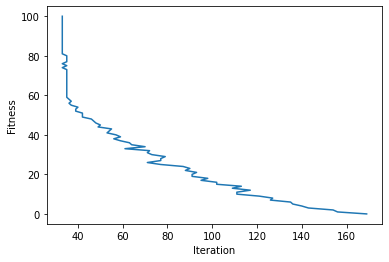

In [22]:
import matplotlib.pyplot

matplotlib.pyplot.plot(best_outputs, iterations)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()